<a href="https://colab.research.google.com/github/arefosco/data_science/blob/master/C%C3%B3pia_de_Projeto_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science and Data Analysis**
*by [Andre Refosco](https://github.com/arefosco)*


[![LinkedIn](https://img.shields.io/badge/LinkedIn-andrerefosco-blue.svg)](https://www.linkedin.com/in/andrerefosco/)  [![GitHub](https://img.shields.io/badge/GitHub-arefosco-brightgreen.svg)](https://github.com/arefosco)
---
  

# **Churn Prediction**

  Churn é caro. Quase sempre custa mais adquirir um novo cliente do que manter um atual e é por isso que há muita motivação para prever isso antes que aconteça.



### **O que é Churn Prediction?** ###

  Churn prediction prevê quais clientes correm alto risco de deixar sua empresa ou cancelar uma assinatura de um serviço, com base no comportamento deles com seu produto.

  Para prever o churn de forma eficaz, você deve sintetizar e utilizar indicadores-chave definidos por sua equipe para sinalizar quando um cliente tem probabilidade de desistir, para que sua empresa possa agir. O objetivo da previsão do churn é ser capaz de responder a perguntas como “O cliente [X] nos deixará em X meses?” ou “O cliente [X] renovará sua assinatura?” e também para entender maiores tendências de churn.

<p align=center>
<img src="https://img.freepik.com/vetores-gratis/proibicao-de-compra-erro-no-site-da-loja-online-cancelamento-de-compra-incapacidade-de-colocacao-de-pedido-limite-de-compra-linha-de-orcamento-personagem-de-desenho-animado-do-comprador-online_335657-1173.jpg?w=1380&t=st=1671554153~exp=1671554753~hmac=e0dbe480b291a0bf47b6c85e9ae220813fa93499e3443c4356ee2a6708f2ef01g" width="60%"></p>


### **Por que Churn Prediction é importante?** ###

  De acordo com um estudo feito pela [McKinsey](https://www.mckinsey.com/industries/technology-media-and-telecommunications/our-insights/grow-fast-or-die-slow-focusing-on-customer-success-to-drive-growth), as empresas de tecnologia e *SaaS* com maior desempenho e crescimento de receita também foram empresas com altas taxas de retenção e baixa rotatividade de receita líquida.

  A capacidade de prever a rotatividade antes que ela aconteça permite que as empresas tomem ações proativas para evitar que os clientes existentes mudem. Isso pode se parecer com:

  * Equipes de sucesso do cliente alcançando esses clientes de alto risco para fornecer suporte ou avaliar quais necessidades podem não estar sendo atendidas;

  * Fornecer campanhas de reengajamento mais direcionadas, como e-mails de lembrete;

  * Criação de conteúdo de educação do cliente mais focado;

  * Reavaliar iniciativas de retenção maiores em toda a empresa, como preços.


  Ao prever o churn, você não está apenas identificando clientes em risco, mas também identificando pontos problemáticos que levam ao churn e ajudando a aumentar a retenção e a satisfação geral do cliente. Prever o churn ajuda a prevenir o churn. A prevenção do churn, por sua vez, é uma ótima fonte de receita para as empresas.

fonte: https://mode.com/blog/predicting-and-preventing-churn/

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:
# import warning filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		7043
Colunas:	21


## Análise Exploratória dos Dados


A fim de começar este projeto, irei verificar a integridade e usabilidade do dataset.

Para isso, deixarei impresso a quantidade de dados ausentes, os nomes das colunas, os tipos de variáveis por coluna e os valores únicos por coluna. Essa última, especificamente, vai auxiliar na identificação de variáveis potencialmente categóricas.

In [ ]:
print("Dados ausentes (total):\t{}\n".format(df.isnull().sum().values.sum()))
print(df.isnull().sum() / df.shape[0])
print("\nNomes das features:\n{}\n".format(df.columns.values))
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))
print("Tipos de Variáveis (por coluna):\n{}".format(df.dtypes))

Dados ausentes (total):	0

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Nomes das features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Valores únicos (por coluna):
customerID          7043
gender                 2
SeniorCitizen          2
Partner             

Veja algumas observações que merecem destaque, observadas nessa fase inicial de awareness:

* A coluna `costumerID` não agrega nenhuma informação, pois se trata de um identificador única para cada cliente.
* A variável alvo está na coluna `Churn`, indicando a situação de churn.
* A coluna `TotalCharges` deveria ser um `float`, mas está como `string`.
    * Como iremos ver mais à frente, apesar de não termos detectado nenhum valor ausente, existem algumas strings que representam sim valores ausentes.
* Várias features precisam ser codificadas para valores numéricos.
    * Há várias features binárias, incluindo nossa variável alvo, ou com múltiplos valores, cada um representando uma categoria.

Retornando à situação de dados ausentes na coluna `TotalCharges`, veja como foi possível identificar (explicado no vídeo da aula).


Quando tentamos converter as strings da coluna `TotalCharges`, acabamos identificando um erro.

O que aconteceu na verdade, foi que os supostos dados ausentes foram lançados como a string `""`. Quando tentamos `float("")`, o interpretador retorna um erro.

Assim, para conseguri converter adequadamente, criei uma função para ldiar com essa exceção. Ao final, identifiquei que dados ausentes foram encontrados, e substitui pelo valor da mediana da coluna.

Abaixo, também já aproveitei e excluí a coluna `customerID`, que seria desnecessária ao longo de todo este projeto.

In [ ]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

# criar cópia do dataframe
df_clean = df.copy()

# remover coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# converter as strings de TotalCharges epara float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

# verificar entradas ausentes
print("Dados ausentes em 'TotalCharges' (antes):\t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)


Dados ausentes em 'TotalCharges' (antes):	11



Apesar deste dataset ser composto majoritariamente por variáveis binárias ou categóricas, é possível ver abaixio, pelo método `describe`, que não há indícios da presença de outliers.

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Analisando o boxplot para as colunas `MonthlyCharges` e `TotalCharges`, perceba como a distribuição dos valores reforça essa hipótese. O threshold padrão não acusou nenhum plot fora dos limites superior e inferior.

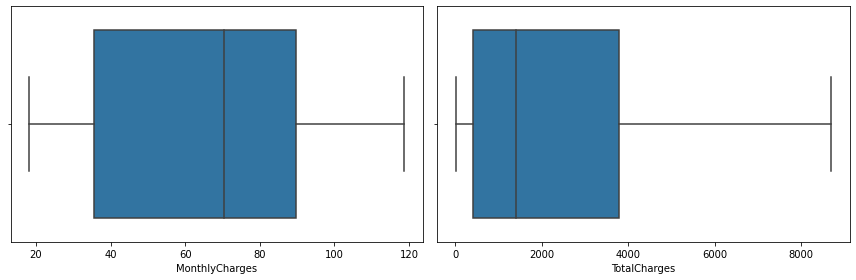

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])
plt.tight_layout()

A variável `tenure` está relacionada ao tempo que um cliente permance assinando determinado serviço. Em outras palavras, pode-se dizer que é um indicativo de fidelidade.

Apesar de não haver nenhuma documentação, assumo que a unidade de tempo utilizada é "mês".

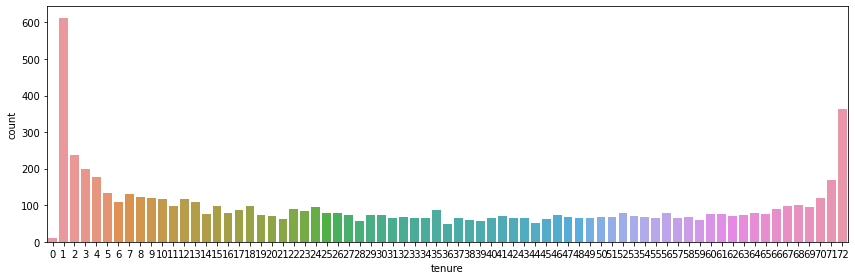

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(df['tenure'])
plt.tight_layout()

Lidando com variáveis categóricas, é importante ver os valores únicos. Isso permite identificar situações como labels diferentes querendo indicar a mesma coisa.

Vendo os valores impressos na célula abaixo, entendo que um cientista de dados pode queer considerar valores como `No`, `No phone service` e `No internet service` como sendo a mesma coisa.

Apesar de totalmente válida, não será essa a premissa adotada aqui. Irei considerar cada label individualmente.

In [ ]:
# verificar valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Para identificar se os nossos dados podem estar com algum tipo de bias (viés), irei verificar a contagem de valores para `Male` e `Female`.

Apesar de não entender que isso poderia gerar algum prejuízo relevante neste problema específico, haverá muitas situações onde esse prejuízo será real, como é o caso de modelos aplicados à contratação de funcionários ou previsão de crimes.

Abaixo, você pode ver que o gênero das entradas está balanceado.

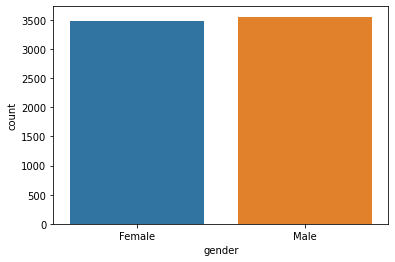

In [ ]:
sns.countplot(df.gender)

Por fim, nesta primeira análise exploratória, vamos ver o balanceamento das classes do dataset.

É possível identificar que a classe `No` ocorre com frequência muito superior à classe `Yes`. Isso será considerado na etapa de construção do modelo de machine learning.

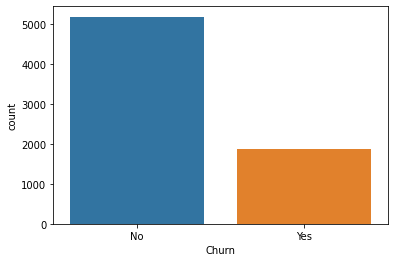

In [ ]:
sns.countplot(df.Churn)

## Preparar os Dados

Nesta etapa de preparação dos dados, será realizado um pré-processamento básico, apenas com a finalidade de construir um modelo base.

As features que continham 2 labels únicos, serão processadas usando-se o `LabelEncoder`. Vale lembrar que isso inclui a variável alvo `Churn`. Na sequência, serão separadas as variáveis numéricas das categóricas. As categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos.

In [ ]:
# pré processar as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criando uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns = cat_var)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


## Modelo de Machine Learning

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.

Para podermos comparar o desempenho e melhora do modelo, criaremos um baseline simples. Não será feito nenhum ajuste nos hiperparâmetros e nem será pensado ainda em balanceamento de dados, feature engineering ou feature selection (entre outros).

No entanto, desde já é importante separar os dados que serão utilizados como treino e como teste. Os dados de teste só irão ser usados na última etapa do projeto, para termos uma avaliação mais real.

In [ ]:
# separar a feature matrix da target vector
X = df_proc.drop('Churn', axis = 1)
y = df_proc['Churn']

# dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)


Irei usar a cross-validation para estimar o erro da baseline e dos modelos iniciais. Para facilitar e melhorar o código, foi criada uma função `val_model`. A métrica utilizada para avaliação será `recall`.

In [ ]:
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy')

    if quite == False:
        print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

    return scores.mean()

Para o baseline inicial, usarei o `SGDClassifier`, sem nenhum tipo de alteração nos parâmetros. Os dados que serão passados são os de treino.

In [ ]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

# criar baseline e ver desempenho
svc = SVC()
score_baseline = val_model(X_train, y_train, svc)

Accuracy: 0.80 (+/- 0.01)


Uma vez que temos um baseline para comparar se os ajustes melhoram ou pioram o desempenho do modelo, irei realizar o balanceamento dos dados e ver como isso irá impactar.

A técnica escolhida foi Under Sampling, após alguns teste de desempenho das outras. Seguindo recomendações de algumas literaturas, os dados serão padronizados antes de usar essa técnica de balanceamento.

Lembrando, é importante que o balanceamento aconteca apenas com os dados de treino. Os dados de teste devem permanecer intocáveis.

In [ ]:
# padronizar os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Irei aplicar a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* LightGBM


In [ ]:
from inspect import modulesbyfile
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
accuracy = []
# avaliar o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
  model.append(clf.__class__.__name__)
  accuracy.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

acc = pd.DataFrame({
    'Model Accuracy' : accuracy,
     "Model Name" : model
})

acc1 = acc.set_index("Model Name").sort_values(by='Model Accuracy', ascending = False)
acc1

,Model Accuracy
Model Name,
XGBClassifier,0.755396
LogisticRegression,0.751439
SVC,0.742446
RandomForestClassifier,0.741727
LGBMClassifier,0.733094
SGDClassifier,0.691007
DecisionTreeClassifier,0.676978


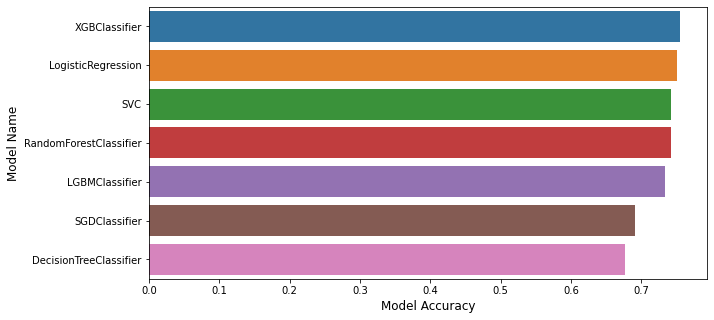

In [ ]:
# barplot plot of Model Accuracy
plt.figure(figsize=(10,5))
sns.barplot(acc1['Model Accuracy'], acc1.index)
plt.xlabel('Model Accuracy', fontsize = 12)
plt.ylabel('Model Name', fontsize = 12);

Dadas as características do problema e o desempenho durante as execuções anteriores, optei pelo RandomForestClassifier.

Meu entendimento é que o tuning dos parâmetros pode melhorar ainda mais a qualidade da solução.

## Otimização dos Hiperparâmetros

RandomForestClassifier possui inúmeros parâmetros. Alguns afetam mais a qualidade do modelo, outros menos. Uma boa prática é definir uma taxa de aprendizado e número de estimadores, realizar tuning de outros parâmetros e, no final, checar outras taxas de aprendizado.

Para definir os parâmetros mais ajustados, iremos explorar as variações com o OPTUNA.

In [ ]:
# instalando o optuna
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import optuna

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb

def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "approx",
        "eval_metric": "auc",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-12-20 20:54:01,374] A new study created in memory with name: no-name-462d841c-204c-4ec2-b59d-33997ed3ff68
[I 2022-12-20 20:54:01,435] Trial 0 finished with value: 0.7932992617830777 and parameters: {'booster': 'gblinear', 'lambda': 0.5446394707395117, 'alpha': 0.0004127447670834184, 'subsample': 0.9434100671441825, 'colsample_bytree': 0.32873373751123874}. Best is trial 0 with value: 0.7932992617830777.
[I 2022-12-20 20:54:01,763] Trial 1 finished with value: 0.7819420783645656 and parameters: {'booster': 'gbtree', 'lambda': 0.07754777869308932, 'alpha': 0.032246945513354726, 'subsample': 0.9823742469322747, 'colsample_bytree': 0.6601129512858535, 'max_depth': 9, 'min_child_weight': 2, 'eta': 8.561208989819709e-06, 'gamma': 0.0015862836727929936, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.7932992617830777.
[I 2022-12-20 20:54:01,904] Trial 2 finished with value: 0.797274275979557 and parameters: {'booster': 'gbtree', 'lambda': 1.1042985176338681e-05, 'alpha': 0.

Number of finished trials:  100
Best trial:
  Value: 0.8154457694491766
  Params: 
    booster: gblinear
    lambda: 2.5870009691911746e-08
    alpha: 5.1544193313078525e-08
    subsample: 0.5673005945209233
    colsample_bytree: 0.894859022789108


Fato é que uma taxa de aprendizado menor, conseguiu melhorar o desempenho do modelo XGBoost, considerando `recall` como sendo a única métrica de importância (premissa assumida por este autor).

Agora, treina-se o modelo em cima do dataset de treino completo, e verifica-se o desempenho final em cima dos dados de teste, no seu primeiro contato com esse sub-conjunto que havia sido preservado.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1282
           1       0.47      0.87      0.61       479

    accuracy                           0.70      1761
   macro avg       0.70      0.75      0.68      1761
weighted avg       0.80      0.70      0.71      1761

AUC: 0.7517



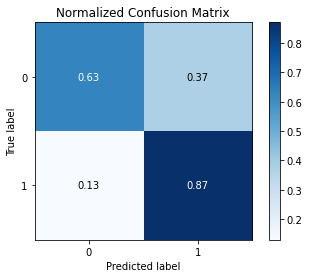

In [ ]:
# modelo final
xgb = XGBClassifier(
    booster = 'gblinear',
    reg_lambda =  2.5870009691911746e-08,
    alpha = 5.1544193313078525e-08,
    subsample = 0.5673005945209233,
    colsample_bytree = 0.894859022789108
)
xgb.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## Conclusões

Os dados de testes não haviam sido passados para o modelo ainda. No entanto, ele manteve um desempenho próximo àquele estimado anteriormente, graças a um bom trabalho de otimização nos parâmetros.

Ainda há espaço para se tentar outras técnicas de balanceamento de dados e também técnicas de machine learning como feature engineering e feature selection.

Fica o convite a você, aluno DSNP, melhorar o nosso modelo. Também convido a expandir a análise exploratória, enriquecendo mais ainda o trabalho.